In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('german.csv')

In [3]:
df

,status,duration,credit-history,purpose,credit-amount,saving-account,employment,installment-rate,sex-marst,other-debtors,...,property,age,other-installment-plans,housing,existing-credits,job,people-liable,telephone,foreign-worker,good-credit
0,no checking account,1 <= ... < 4 yrs,all credits at this bank paid back duly,car (used),"(500, 2500]",unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,"(20, 30]",none,for free,1,skilled employee / official,0 to 2,no,no,1
1,no checking account,< 1 yr,all credits at this bank paid back duly,others,"(2500, 5000]",unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,"(30, 40]",none,for free,2-3,skilled employee / official,3 or more,no,no,1
2,... < 0 DM,< 1 yr,no credits taken/all credits paid back duly,retraining,"(500, 2500]",... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,"(20, 30]",none,for free,1,unskilled - resident,0 to 2,no,no,1
3,no checking account,< 1 yr,all credits at this bank paid back duly,others,"(500, 2500]",unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,"(30, 40]",none,for free,2-3,unskilled - resident,3 or more,no,yes,1
4,no checking account,< 1 yr,all credits at this bank paid back duly,others,"(500, 2500]",unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,"(30, 40]",bank,rent,2-3,unskilled - resident,0 to 2,no,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,1 <= ... < 4 yrs,no credits taken/all credits paid back duly,furniture/equipment,"(500, 2500]",unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,"(20, 30]",none,for free,1,unskilled - resident,3 or more,no,no,0
996,no checking account,1 <= ... < 4 yrs,no credits taken/all credits paid back duly,others,"(500, 2500]",unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,"(40, 50]",none,rent,1,skilled employee / official,0 to 2,no,no,0
997,... >= 200 DM / salary for at least 1 year,1 <= ... < 4 yrs,all credits at this bank paid back duly,others,>10000,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,"(20, 30]",none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,0
998,... < 0 DM,< 1 yr,no credits taken/all credits paid back duly,furniture/equipment,"(5000, 10000]",... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,"(50, 60]",none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,0


<AxesSubplot:xlabel='good-credit', ylabel='Count'>

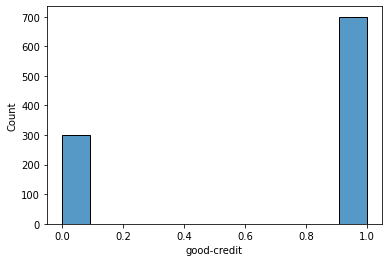

In [5]:
sns.histplot(df['good-credit'])

<AxesSubplot:xlabel='duration', ylabel='Count'>

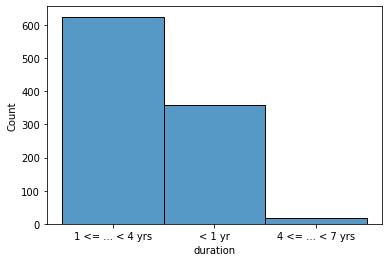

In [6]:
sns.histplot(df.duration)

<AxesSubplot:xlabel='credit-amount', ylabel='Count'>

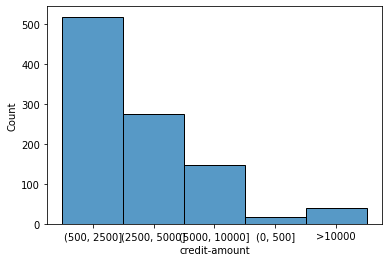

In [7]:
sns.histplot(df['credit-amount'])

<AxesSubplot:xlabel='installment-rate', ylabel='Count'>

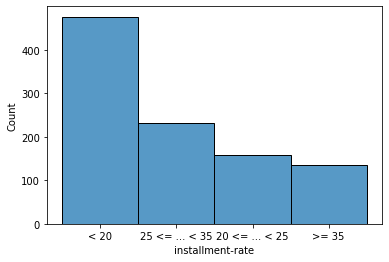

In [8]:
sns.histplot(df['installment-rate'])

In [9]:
df['installment-rate'].unique()

array(['< 20', '25 <= ... < 35', '20 <= ... < 25', '>= 35'], dtype=object)

<AxesSubplot:xlabel='residence', ylabel='Count'>

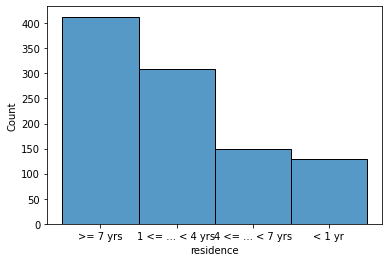

In [10]:
sns.histplot(df['residence'])

<AxesSubplot:xlabel='age', ylabel='Count'>

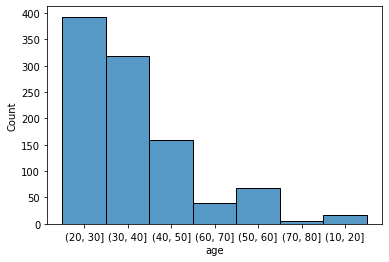

In [11]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='existing-credits', ylabel='Count'>

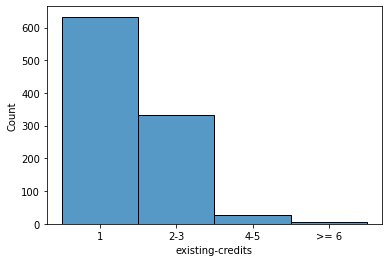

In [12]:
sns.histplot(df['existing-credits'])

<AxesSubplot:xlabel='people-liable', ylabel='Count'>

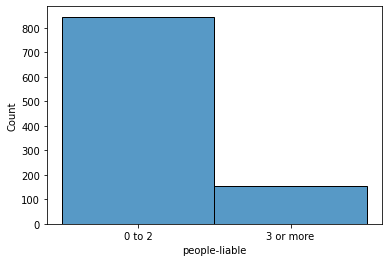

In [14]:
sns.histplot(df['people-liable'])

In [16]:
full_attributes = ['status', 'duration', 'credit-history', 'purpose', 'credit-amount', 'saving-account', 'employment', 'installment-rate', 'sex-marst', 'other-debtors', 'residence', 'property', 'age', 'other-installment-plans', 'housing', 'existing-credits', 'job', 'people-liable', 'telephone', 'foreign-worker']
for attr in full_attributes:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 
'display.max_colwidth', 1000):
        print(df.groupby(attr).agg(answer=('good-credit', 'mean'), count=('good-credit', 'count')))

                                              answer  count
status                                                     
... < 0 DM                                  0.609665    269
... >= 200 DM / salary for at least 1 year  0.883249    394
0<= ... < 200 DM                            0.777778     63
no checking account                         0.507299    274
                    answer  count
duration                         
1 <= ... < 4 yrs  0.654400    625
4 <= ... < 7 yrs  0.500000     16
< 1 yr            0.788301    359
                                               answer  count
credit-history                                              
all credits at this bank paid back duly      0.829352    293
critical account/other credits elsewhere     0.428571     49
delay in paying off in the past              0.375000     40
existing credits paid back duly till now     0.681818     88
no credits taken/all credits paid back duly  0.681132    530
                       answer  count
purpos

In [21]:
df['checking-account'].value_counts(normalize=False)

no checking account                                   394
no balance or debit                                   274
[0, 200) DM                                           269
>= 200 DM / salary assignments for at least 1 year     63
Name: checking-account, dtype: int64

In [28]:
df.query("`checking-account` == 'no checking account'")['good-credit'].value_counts(normalize=True)

1    0.883249
0    0.116751
Name: good-credit, dtype: float64

In [31]:
df.query('`good-credit` == 1')['checking-account'].value_counts(normalize=True)

no checking account                                   0.497143
[0, 200) DM                                           0.234286
no balance or debit                                   0.198571
>= 200 DM / salary assignments for at least 1 year    0.070000
Name: checking-account, dtype: float64